**Redback racing Introductory Heatmap analysis - Klaus**

In [ ]:
import numpy as np 
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import statsmodels.formula.api as smf

drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive


In [ ]:
full_df = pd.read_csv('/content/gdrive/MyDrive/final_df.csv')
full_df.head()

,Unnamed: 0,Unnamed: 0.1,SpeedKMH_mean,SpeedKMH_max,SpeedKMH_min,Gas_mean,Gas_max,Gas_min,Brake_mean,Brake_max,...,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC
0,0,0,46.824779,84.609711,0.000000,0.719945,1.0,0.000000,0.147455,0.948782,...,-1.7086,56670.77262,104990.04453,0.10876,1198.9936,503.80323,2101.67425,1153.26332,15.86391,11.37812
1,1,1,61.355012,90.476089,39.721592,0.808638,1.0,0.000578,0.042622,0.952429,...,-1.7086,56670.77262,104990.04453,0.10876,1198.9936,503.80323,2101.67425,1153.26332,15.86391,11.37812
2,3,3,61.096449,90.427589,39.696712,0.811576,1.0,0.000431,0.044044,0.952889,...,-1.7086,56670.77262,104990.04453,0.10876,1198.9936,503.80323,2101.67425,1153.26332,15.86391,11.37812
3,5,5,60.759023,90.181877,39.782829,0.808622,1.0,0.000080,0.045326,0.945166,...,-1.7086,56670.77262,104990.04453,0.10876,1198.9936,503.80323,2101.67425,1153.26332,15.86391,11.37812
4,6,6,60.949152,89.712265,39.822598,0.809457,1.0,0.000413,0.044219,0.937211,...,-1.7086,56670.77262,104990.04453,0.10876,1198.9936,503.80323,2101.67425,1153.26332,15.86391,11.37812


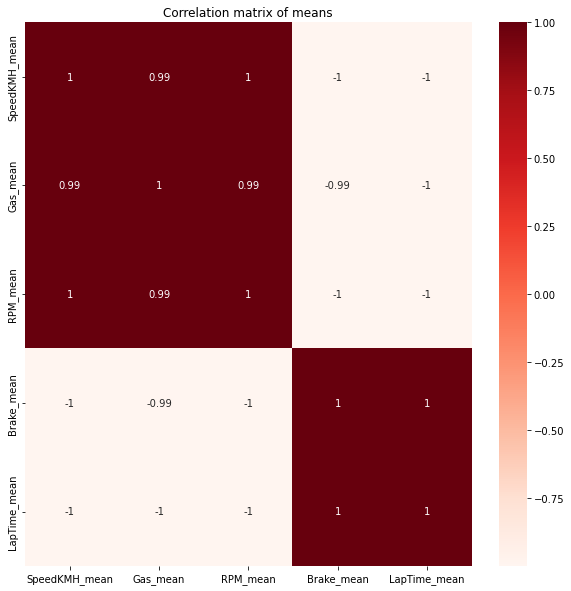

In [ ]:
# Start to find information to answer "Which setup gives the fastest car"

# Heatmap displaying the correlation matrix of key covariates
df1 = full_df[['SpeedKMH_mean','Gas_mean','RPM_mean', 'Brake_mean', 'LapTime_mean']]
plt.figure(figsize=(10,10))
plt.title("Correlation matrix of means")
sns.heatmap(df1.corr(),cbar=True,annot=True,cmap='Reds')
plt.show()

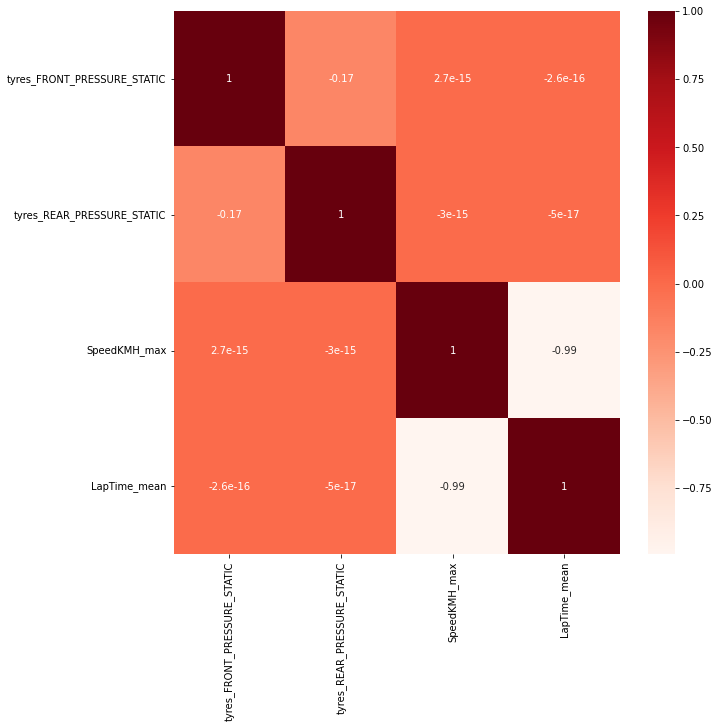

In [ ]:
# Heatmap displaying the correlation matrix of key covariates
df2 = full_df[['tyres_FRONT_PRESSURE_STATIC', 'tyres_REAR_PRESSURE_STATIC', 'SpeedKMH_max', 'LapTime_mean']]
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),cbar=True,annot=True,cmap='Reds')
plt.show()

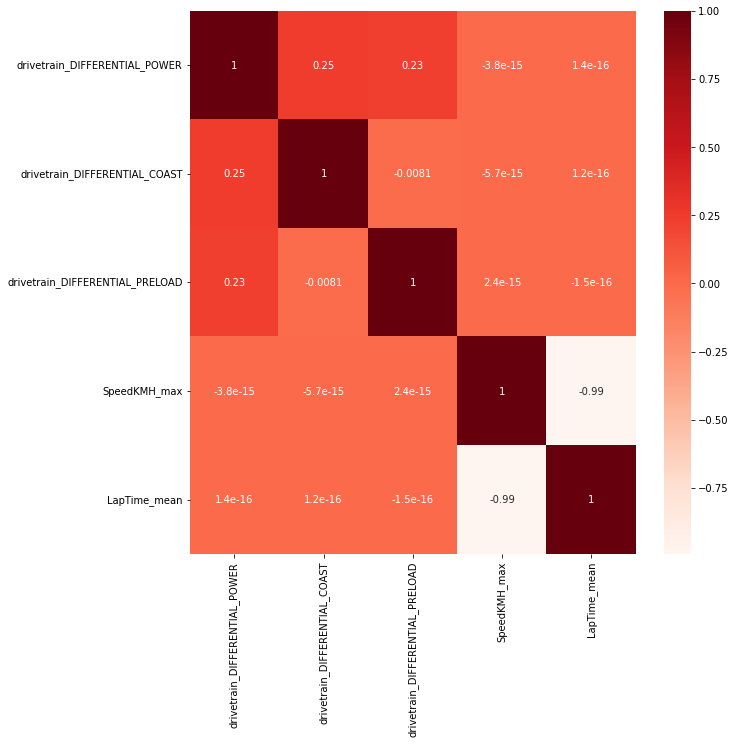

In [ ]:
# Heatmap displaying the correlation matrix of key covariates
df3 = full_df[['drivetrain_DIFFERENTIAL_POWER', 'drivetrain_DIFFERENTIAL_COAST', 'drivetrain_DIFFERENTIAL_PRELOAD', 'SpeedKMH_max', 'LapTime_mean']]
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(),cbar=True,annot=True,cmap='Reds')
plt.show()

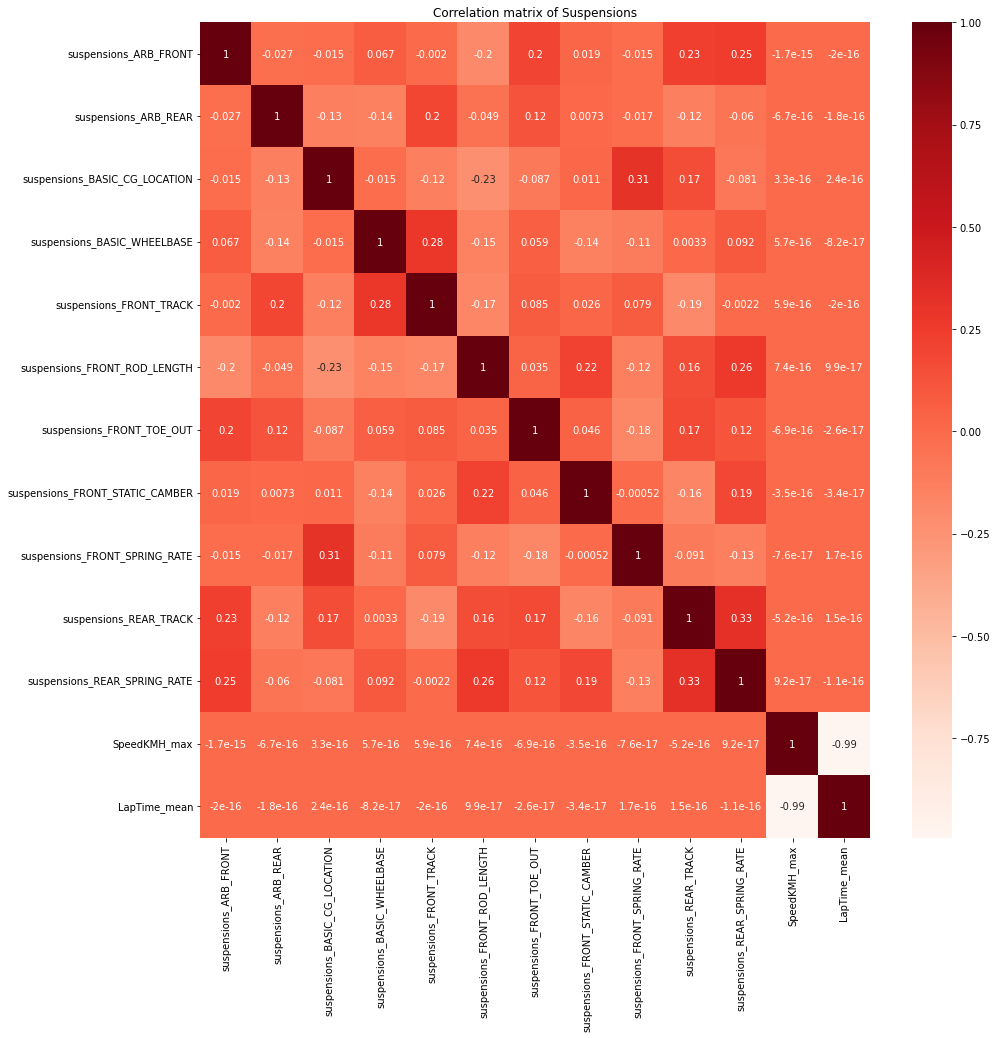

In [ ]:
# Heatmap displaying the correlation matrix of key covariates
df4 = full_df[['suspensions_ARB_FRONT', 'suspensions_ARB_REAR', 'suspensions_BASIC_CG_LOCATION', 'suspensions_BASIC_WHEELBASE', 'suspensions_FRONT_TRACK', 'suspensions_FRONT_ROD_LENGTH', 'suspensions_FRONT_TOE_OUT', 'suspensions_FRONT_STATIC_CAMBER', 'suspensions_FRONT_SPRING_RATE', 'suspensions_REAR_TRACK', 'suspensions_REAR_SPRING_RATE', 
               'SpeedKMH_max', 'LapTime_mean']]
plt.figure(figsize=(15,15))
plt.title("Correlation matrix of Suspensions")
sns.heatmap(df4.corr(),cbar=True,annot=True,cmap='Reds')
plt.show()

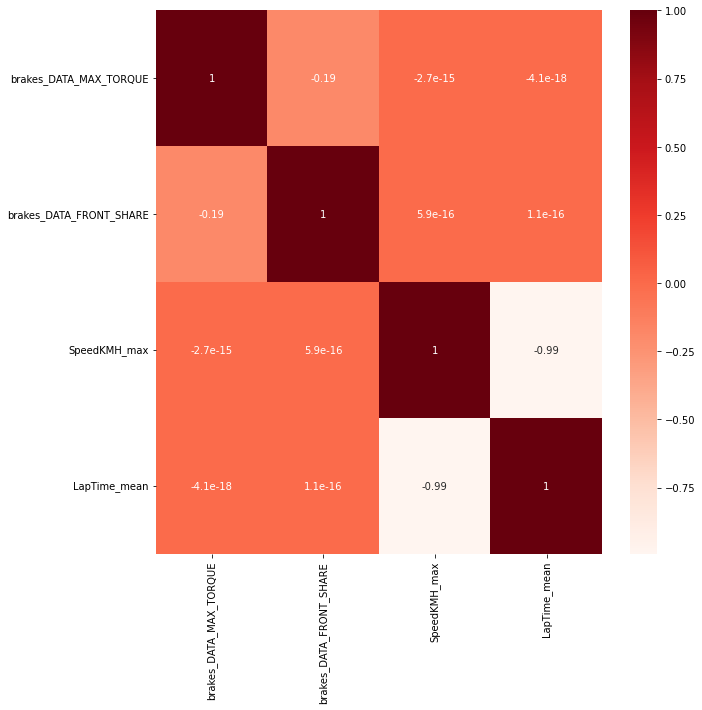

In [ ]:
# Heatmap displaying the correlation matrix of key covariates
df5 = full_df[['brakes_DATA_MAX_TORQUE', 'brakes_DATA_FRONT_SHARE', 'SpeedKMH_max', 'LapTime_mean']]
plt.figure(figsize=(10,10))
sns.heatmap(df5.corr(),cbar=True,annot=True,cmap='Reds')
plt.show()